In [1]:
import pandas as pd
import numpy as np

# Classification model evaluation metrics

## Accuracy

In [2]:
heart_disease = pd.read_csv("../data/heart-disease.csv")

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)
np.mean(cross_val_score)

0.8248087431693989

## AUC/ROC curve
*Area under the receiver operating characteristic curve*

ROC curve are a comparison of a model's true positive rate (tpr) VS a model's false positive rate (fpr)
+ True positive = model predicts `1` when truth is `1`
+ False positive = model predicts `1` when truth is `0`
+ True negative = model predicts `0` when truth is  `0`
+ False negative = model predicts `0` when truth is `1`

In [5]:
# Create train test set...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [7]:
y_probs_positive = y_probs[:, 1] # type: ignore #we only want the second column so we slice it
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [8]:
# Calculate fpt, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [9]:
type(fpr)

numpy.ndarray

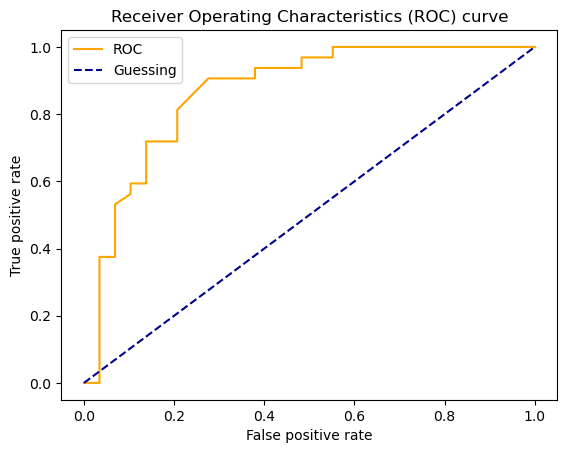

In [10]:
# We need to plot fpr to see in a way we can understand the data
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.

    Args:
        fpr (ndarray): False positive rate
        tpr (ndarray): True positive rate
    """
    #Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    #Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

##  Confusion matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [11]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [12]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(
    y_test,
    y_preds,
    rownames=["Actual labels"],
    colnames=["Predicted labels"]
)

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


In [13]:
import sys
%conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


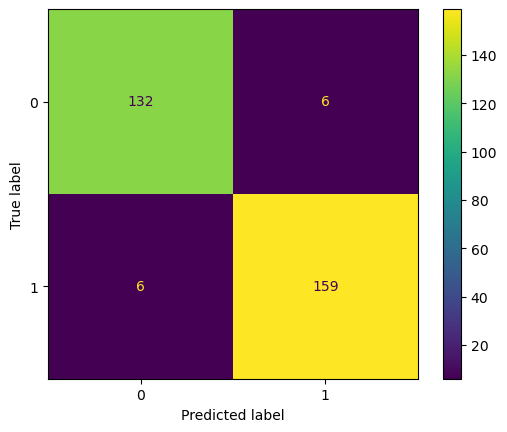

In [14]:
# Make our confusion matrix more visual with sklearn
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

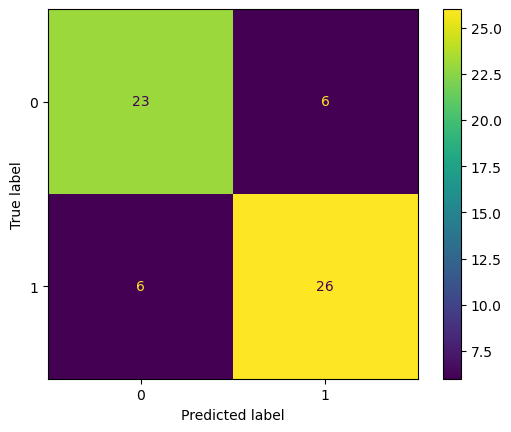

In [15]:
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test,
    y_pred = y_preds
);

## Classification Report

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



To summarize classification metrics:
+ *Accuracy* is a good measure to start with if all classes are balanced (e.g. same amount of samples)
+ *Precision* and *recall* become more important when classes are imbalanced.
+ If false positive predictions are worse than false negatives, aim for higher precision.
+ If false negative predictions are worse than false positives, aim for higher recall.
+ *F1-score* is a combination of precision and recall.

# Regression model evaluation metrics
1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [17]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing_df = housing.frame # type: ignore

In [18]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [20]:
model.score(X_test, y_test)

0.8066196804802649

# Scoring parameter

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [22]:
np.random.seed(42)

# Cross-Validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [23]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [24]:
# Using accuracy

cross_val_score(clf, X, y, cv=5, scoring="accuracy")

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [25]:
# Using precision

cross_val_score(clf, X, y, cv=5, scoring="precision")

array([0.80555556, 0.90322581, 0.83870968, 0.78787879, 0.76923077])

In [26]:
# Using Recall

cross_val_score(clf, X, y, cv=5, scoring="recall")

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.84848485])

In [27]:
# Using f1 score

#cross_val_score(clf, X, y, cv=5, scoring="f1_score")

# Improving a model
Firt predictions = baseline predictions
First model = baseline model

From a data prespective:
+ Could we collect more data? [generally, the more data, the better]
+ Could we improve our data? Give more features within each sample

From a model prespective:
+ Is there a better model we could use?
+ Could we improve our current model? Improve the hyper-parameters [settings on a model to ajust]

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = RandomForestClassifier()

These are hyper-parameters 👇 we can make a few tweeks on

In [29]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Tuning hyperparameters by hand
I am going to tune a few of these hyperparameters and see what we get

In [46]:
def evaluate_preds(y_true, y_preds):
    """It takes the y_true data and the y_preds data from a Classification model and it gives back the metrics of accuracy, precision, recall and f1 score.

    Args:
        y_true (ndarray): The true data (the target data)
        y_preds (ndarray): What the AI predicted
    """
    acc = accuracy_score(y_true, y_preds)
    prec = precision_score(y_true, y_preds)
    rec = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metric_dict = {
        "accuracy" : round(acc, 2),
        "precision" : round(prec, 2),
        "recall" : round(rec, 2),
        "f1_score" : round(f1, 2)
    }

    return metric_dict

In [47]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

train_split_size = round(0.7 * len(heart_disease_shuffled))
validate_split_size = round(train_split_size + 0.15 * len(heart_disease_shuffled))

X_train, y_train = X.iloc[:train_split_size], y.iloc[:train_split_size]
X_valid, y_valid = X.iloc[train_split_size:validate_split_size], y.iloc[train_split_size:validate_split_size]
X_test, y_test = X.iloc[validate_split_size:], y.iloc[validate_split_size:]

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1_score': 0.85}

Making some tweeks to the hyperparameters to see if I can improve the model 🚀📈

In [56]:
np.random.seed(42)

# Create a 2nd classifier
clf_2 = RandomForestClassifier(n_estimators=150)
clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_valid)

evaluate_preds(y_valid, y_preds_2)

{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1_score': 0.82}

Instead of tweeking each parameter by hand we can use a built it function that does that, it will be faster using "Randomized Search CV" function